In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Read file
df2 = pd.read_excel('data2.xlsx')

In [ ]:
df2

,Comment,label
0,memudahkan untuk segala transaksi mantap,1
1,Bagus,1
2,Selamat pagi bapak/ibu mohon maaf kenapa saya ...,1
3,Semoga berkelimpahan terus saldo saya,1
4,Kenapa tidak bisa update mbca terbaru,0
...,...,...
28517,"Update apa""an ini woy , gue dari kmrin gk bisa...",0
28518,Tolong pihak BCA mobile segera cari solusinya ...,1
28519,"Jelek banget ,,!!! Pake bca mobile setiap mau ...",0
28520,Dulu aplikasi mbanking bca dibanding mbanking ...,0


##DATA PREPROCESSING

### 1. Data Cleaning

In [ ]:
import re
import string

In [ ]:
def cleansing(text):
    # Case folding = lower
    text = text.lower()

    # Case folding = remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Case folding = remove whitespace
    text = text.strip()

    # Case folding = remove mention (@username)
    text = re.sub(r'@\w+', '', text)

    # Case folding = remove hashtag (#tag)
    text = re.sub(r'#\w+', '', text)

    # Case folding = remove URL or link
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove ASCII and unicode
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]', '', text)

    # Remove newline
    text = text.replace('\n', '')

    return text

df2['Comment'] = df2['Comment'].apply(cleansing)

###2. Normalisasi

In [ ]:
norm = {
    "ok" : "bagus",
    "dgn": "dengan",
    "bgt": "banget",
    "tdk": "tidak",
    "bgmn": "bagaimana",
    "gue" : "saya",
    "gua" : "saya",
    "good" : "bagus",
    "ajah" : "saja",
    "yh" : "ya",
    "dg" : "dengan",
    "keren": "bagus",
    "mantap" : "bagus"
}

def normalisasi(text) :
   for i in norm:
      text = text.replace(i, norm[i])

   return text

df2['Comment'] = df2['Comment'].apply(normalisasi)

###3. Filtering (StopWords)

In [ ]:
pip install 'Sastrawi'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create StopWordRemover
factory = StopWordRemoverFactory()
stopwords_remover = factory.create_stop_word_remover()

# Function to remove stopwords
def stopword(text):
    return stopwords_remover.remove(text)

df2['Comment'] = df2['Comment'].apply(stopword)

df2.head()

,Comment,label
0,memudahkan segala transaksi bagus,1
1,bagus,1
2,selamat pagi bapakibu mohon maaf bisa login bc...,1
3,semoga berkelimpahan terus saldo,1
4,tidak update mbca terbaru,0


##4. Tokenez

In [ ]:
def tokenized(text):
    text = text.split()
    return text

tokenized = df2['Comment'].apply(tokenized)

tokenized

,Comment
0,"[memudahkan, segala, transaksi, bagus]"
1,[bagus]
2,"[selamat, pagi, bapakibu, mohon, maaf, bisa, l..."
3,"[semoga, berkelimpahan, terus, saldo]"
4,"[tidak, update, mbca, terbaru]"
...,...
28517,"[update, apaan, woy, dari, kmrin, gk, msuk]"
28518,"[pihak, bca, mobile, segera, cari, solusinya, ..."
28519,"[jelek, banget, pake, bca, mobile, mau, transa..."
28520,"[dulu, aplikasi, mbanking, bca, dibanding, mba..."


##5. Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Comment):
    stemfactory = StemmerFactory()
    stemmer = stemfactory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in Comment]
    d_clean = " ".join(stemmed_words)
    return d_clean

tokenized = tokenized.apply(stemming)

In [ ]:
# Save data to csv
tokenized.to_csv('cleandata_1.csv', index=False)

In [ ]:
# Download file to laptop
from google.colab import files
files.download('cleandata_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read file
data_clean = pd.read_csv('cleandata_1.csv')

In [ ]:
data_clean

,Comment
0,mudah segala transaksi bagus
1,bagus
2,selamat pagi bapakibu mohon maaf bisa login bc...
3,moga limpah terus saldo
4,tidak update mbca baru
...,...
28517,update apa woy dari kmrin gk msuk
28518,pihak bca mobile segera cari solusi tiap login...
28519,jelek banget pake bca mobile mau transaksi sel...
28520,dulu aplikasi mbanking bca banding mbanking la...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleandata_1.csv to cleandata_1.csv


In [ ]:
d1 = pd.read_csv('cleandata_1.csv')
d2 = pd.read_excel('data2.xlsx')
dd2 = d2['label']

result = pd.concat([d1, dd2], axis = 1)

In [ ]:
result

,Comment,label
0,mudah segala transaksi bagus,1
1,bagus,1
2,selamat pagi bapakibu mohon maaf bisa login bc...,1
3,moga limpah terus saldo,1
4,tidak update mbca baru,0
...,...,...
28517,update apa woy dari kmrin gk msuk,0
28518,pihak bca mobile segera cari solusi tiap login...,1
28519,jelek banget pake bca mobile mau transaksi sel...,0
28520,dulu aplikasi mbanking bca banding mbanking la...,0


### The cleansing, stopword and stemming processes can result in empty or missing data.

In [ ]:
missing_values = result['Comment'].isnull().sum()

In [ ]:
missing_values

192

In [ ]:
#change the value of missing data to nan
df3 = result.replace('', pd.NA)

In [ ]:
#drop the missing value data
df3.dropna(inplace=True)

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3.drop(columns='index', inplace=True)

In [ ]:
df3

,Comment,label
0,mudah segala transaksi bagus,1
1,bagus,1
2,selamat pagi bapakibu mohon maaf bisa login bc...,1
3,moga limpah terus saldo,1
4,tidak update mbca baru,0
...,...,...
28325,update apa woy dari kmrin gk msuk,0
28326,pihak bca mobile segera cari solusi tiap login...,1
28327,jelek banget pake bca mobile mau transaksi sel...,0
28328,dulu aplikasi mbanking bca banding mbanking la...,0


In [ ]:
missing_values_df3 = df3['Comment'].isnull().sum()

In [ ]:
missing_values_df3

0

##TF-IDF
Mengukur seberapa sering suatu kata muncul dalam dokumen. Semakin sering kata muncul, semakin tinggi nilai TF-nya.

###split data TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df3['Comment'], df3['label'],test_size = 0.2, stratify=df3['label'], random_state = 42)

In [ ]:
#For the vctorization, we use the TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(22664, 14861)
(5666, 14861)


##Model SVM

In [ ]:
#define SVM model
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel = 'linear')

In [ ]:
#fit and predict model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score

f1 = f1_score(y_test, predict)
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

#Show the classification report
print('f1-score:', f1)
print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)


f1-score: 0.8407116259826231
Accuracy score: 0.8641016590187081
Precision score: 0.9177958446251129
Recall score: 0.7755725190839695


In [ ]:
# results confusion matrix
cm = confusion_matrix(y_test, predict)

In [ ]:
cm

array([[2864,  182],
       [ 588, 2032]])

In [ ]:
tp = cm[1, 1]  # True Positif
fp = cm[0, 1]  # False Positif
fn = cm[1, 0]  # False Negatif
tn = cm[0, 0]  # True Negatif

# Show results
print("True Positif = ", tp, "\nFalse Positif = ", fp, "\nFalse Negatif = ", fn, "\nTrue Negatif = ", tn)



True Positif =  2032 
False Positif =  182 
False Negatif =  588 
True Negatif =  2864


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

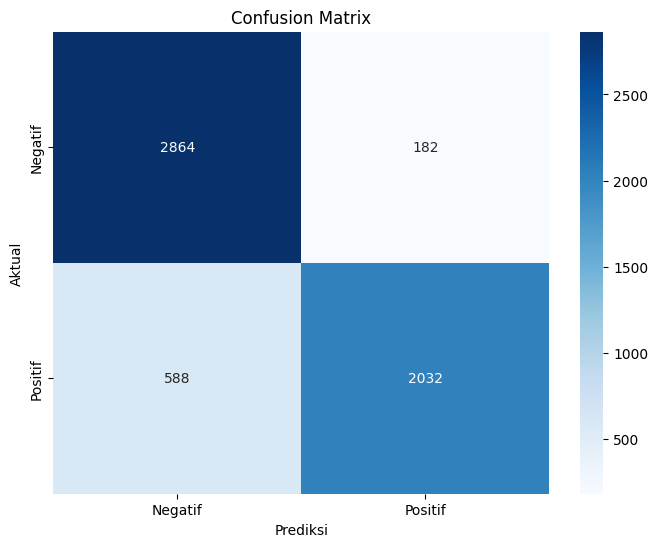

In [ ]:
# Show a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title('Confusion Matrix')
plt.show()